<a href="https://colab.research.google.com/github/themendu/IPL-Predictor/blob/master/DNN_Modelling_IPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

final=pd.read_csv('/content/drive/My Drive/changed_data.csv')

In [80]:

final.shape

(519, 73)

In [0]:
final= final.astype('float64') 

In [0]:
final.drop(columns=['Unnamed: 0'],inplace=True)

In [83]:
final.isnull().any()

Season_Year                      False
day                              False
month                            False
winner                           False
a                                False
                                 ...  
Kolkata Knight Riders.1          False
Mumbai Indians.1                 False
Rajasthan Royals.1               False
Royal Challengers Bangalore.1    False
Sunrisers Hyderabad.1            False
Length: 72, dtype: bool

In [0]:
final_team1=final.iloc[:,0:64]

In [0]:
listhy=final.columns[56:64]
final_team2=final.drop(columns=listhy,inplace=False)

In [0]:
from sklearn.model_selection import train_test_split
def datasplitter(data):
    train_data, val_data = train_test_split(data, test_size = 0.15, random_state = 9)
    y_train = train_data['winner'].values
    y_val = val_data['winner'].values
    x_train = train_data.drop(['winner'], axis = 1).values
    x_val = val_data.drop(['winner'], axis = 1).values
    return y_train,y_val,x_train,x_val


y_train,y_val,x_train,x_val=datasplitter(final)
#y_train2,y_val2,x_train2,x_val2=datasplitter(final_team2)


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train1=scaler.fit_transform(x_train)

x_val1=scaler.transform(x_val)

In [106]:
import tensorflow as tf
from keras import models
from keras import layers
from keras.layers import Dropout
from keras import optimizers
from keras import initializers


model = models.Sequential()
model.add(Dropout(0.2, input_shape=(71,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

opt=optimizers.SGD(lr=0.001, momentum=0.8, nesterov=True)
#opt=optimizers.Adadelta(lr=0.005, rho=0.95)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train1,y_train,epochs=20,batch_size=32,validation_data=(x_val1, y_val))




Train on 441 samples, validate on 78 samples
Epoch 1/20
441/441 [==============================] - 2s 4ms/step - loss: 0.7954 - acc: 0.5669 - val_loss: 0.7547 - val_acc: 0.5385
Epoch 2/20
441/441 [==============================] - 0s 62us/step - loss: 0.7571 - acc: 0.5646 - val_loss: 0.7366 - val_acc: 0.5128
Epoch 3/20
441/441 [==============================] - 0s 62us/step - loss: 0.7395 - acc: 0.5578 - val_loss: 0.7248 - val_acc: 0.5513
Epoch 4/20
441/441 [==============================] - 0s 64us/step - loss: 0.7223 - acc: 0.5624 - val_loss: 0.7171 - val_acc: 0.5641
Epoch 5/20
441/441 [==============================] - 0s 62us/step - loss: 0.7292 - acc: 0.5374 - val_loss: 0.7124 - val_acc: 0.5641
Epoch 6/20
441/441 [==============================] - 0s 65us/step - loss: 0.7279 - acc: 0.5533 - val_loss: 0.7092 - val_acc: 0.5385
Epoch 7/20
441/441 [==============================] - 0s 62us/step - loss: 0.7091 - acc: 0.5760 - val_loss: 0.7076 - val_acc: 0.5128
Epoch 8/20
441/441 [=====

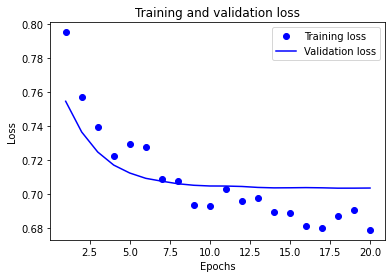

In [107]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

